In [24]:
import numpy as np
import matplotlib.pyplot as plt

   
f = lambda x,y: 4*np.exp(0.8*x)-0.5*y
sol = lambda x: 4/1.3*(np.exp(0.8*x)-np.exp(-0.5*x))+2*np.exp(-0.5*x)
ci = 2
paso = 10 
intervalo = [0,4]


In [34]:
def Euler (f,paso,ci,intervalo):
    
    y = [ci]
    t = np.linspace (intervalo[0],intervalo[1],paso+1)
    h = (intervalo[1]-intervalo[0])/paso
    
    for i in range (paso):       
        y.append(y[i] + f(t[i],y[i]) * h)
        
    return y

In [38]:
def Heun (f,paso,ci,intervalo):
    
    y = [ci]
    t = np.linspace (intervalo[0],intervalo[1],paso+1)
    h = (intervalo[1]-intervalo[0])/paso
    
    for i in range (paso):
        a1 =  f(t[i],y[i])
        y0 = y[i] + f(t[i],y[i]) * h
        a2 = f(t[i]+h,y0)
        y.append(y[i]+(a1 + a2)*h/2)
        
    return y
    

In [39]:
def runge_kutta(f,ci,paso,intervalo):
    
    y = [ci]
    #t = intervalo[0] '''cuando defino t asi y voy sumando h en el for se aleja mas que si defino el intervalo como esta aca ¿porque sera?'''
    t = np.linspace (intervalo[0],intervalo[1],paso+1)
    h = (intervalo[1]-intervalo[0])/paso
    
    for i in range (paso):
        #t += h '''Al hacer esto da peor'''
        k1 = f(t[i],y[i])
        k2 = f(t[i]+1/2*h,y[i]+1/2*h*k1)
        k3 = f(t[i]+1/2*h,y[i]+1/2*h*k2)
        k4 = f(t[i]+h,y[i]+h*k2)
        y.append (y[i]+1/6*(k1+2*k2+2*k3+k4)*h)
                
    return y


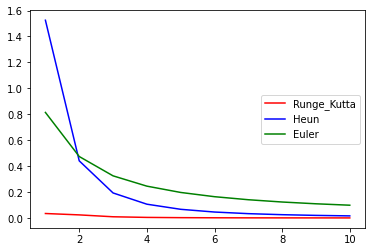

In [73]:
error1 = []; error2 = []; error3 = []
Paso = []
t = np.linspace (intervalo[0],intervalo[1],paso+1)
sol1 = sol(t)

for paso in range(1,11):
    
    y1 = runge_kutta(f,ci,paso,intervalo)
    y2 = Heun (f,paso,ci,intervalo)
    y3 = Euler (f,paso,ci,intervalo)   
    
    error1.append(abs((y1[-1] - sol1[-1])/sol1[-1]))
    error2.append(abs((y2[-1] - sol1[-1])/sol1[-1]))
    error3.append(abs((y3[-1] - sol1[-1])/sol1[-1]))    
    Paso.append(paso)
    

plt.plot(Paso,error1,'r',label ='Runge_Kutta')
plt.plot(Paso,error2,'b', label = 'Heun')
plt.plot(Paso,error3,'g', label = 'Euler')
plt.legend(loc = 'center right')
plt.show()